In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

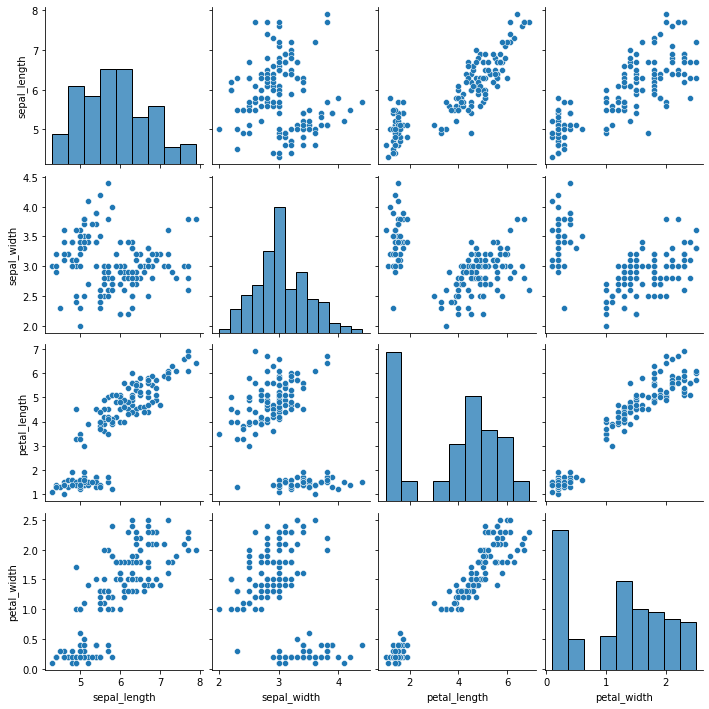

In [ ]:
sns.pairplot(iris)

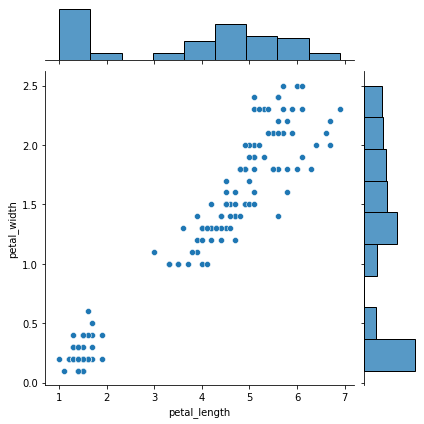

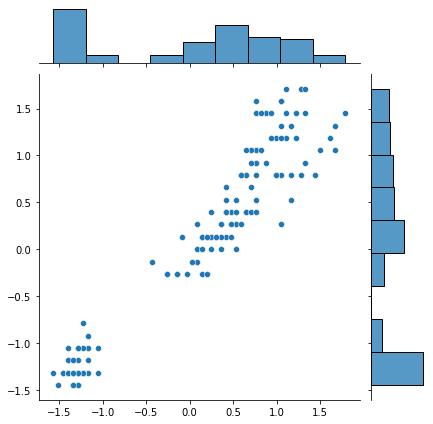

In [ ]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])

Descomposicion en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


PCA con scikit : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
reduced_scaled = pca.transform(scaled)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


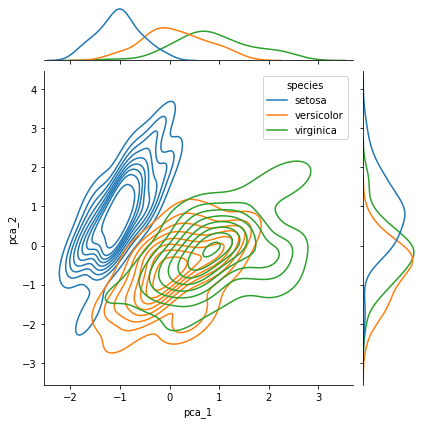

In [ ]:
iris['pca_1'] = scaled[:,0]
iris['pca_2'] = scaled[:,1]
sns.jointplot(iris['pca_1'], iris['pca_2'], hue = iris['species'], kind = 'kde')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7410a8e7-03f0-4a0f-83fd-3eb64b01aa8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>